<a href="https://colab.research.google.com/github/Nanasei878/Apple-identification-and-classification-/blob/main/Prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
from google.colab.patches import cv2_imshow
# Technically not necessary in newest versions of jupyter
%matplotlib inline
#sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/

/content


In [ ]:
frame = cv2.imread('4_100.jpg')
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
frame = np.array(frame)

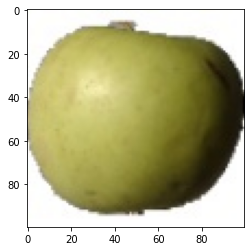

In [ ]:
plt.imshow(frame)

# Resizing the Image (optional)

In [ ]:
img_size =416

In [ ]:
frame=cv2.resize(frame,(img_size,img_size))

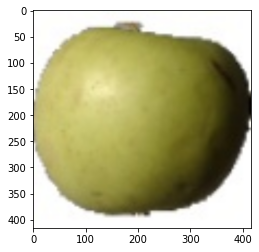

In [ ]:
plt.imshow(frame)

In [ ]:
frame.shape

(416, 416, 3)

In [ ]:
filename = 'savedImage.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, frame)

True

# YOLO V5 

Setting up the environment

In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 596 kB 7.1 MB/s 
Setup complete. Using torch 1.10.0+cu111 CPU


Making prediction with the model, using weights from the pretrained custom images

In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/gdrive/MyDrive/yolov5s/yolov5/
#!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images
#!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --exist-ok --source /content/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --exist-ok --source /content/4_100.jpg

/content/gdrive/MyDrive/yolov5s/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=True, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/4_100.jpg', update=False, view_img=False, weights=['runs/train/yolov5s_results/weights/best.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.10.0+cu111 CPU

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 232 layers, 7249215 parameters, 0 gradients, 16.8 GFLOPS
image 1/1 /content/4_100.jpg: 416x416 1 apple, Done. (0.198s)
Results saved to runs/detect/exp
Done. (0.210s)


In [ ]:
%cd  /content/gdrive/My Drive/yolov5s/yolov5/runs/detect/exp/

/content/gdrive/My Drive/yolov5s/yolov5/runs/detect/exp


In [ ]:
%ls

4_100.jpg  5_100.jpg  savedImage.jpg


In [ ]:
%pwd

'/content/gdrive/My Drive/yolov5s/yolov5/runs/detect/exp15'

First Option to view predictions

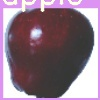

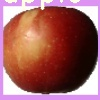

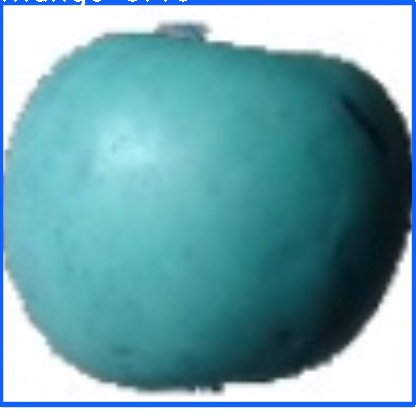

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

#for imageName in glob.glob('/content/yolov5/runs/detect/exp9/*.jpg'): #assuming JPG
for imageName in glob.glob('/content/gdrive/My Drive/yolov5s/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName,))
    print("\n")

Second Option to view predictions

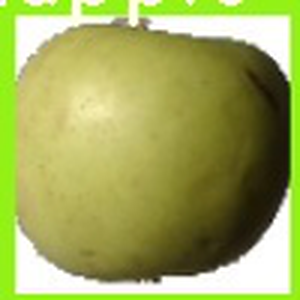

In [ ]:
from PIL import Image
basewidth = 300

img = Image.open('/content/gdrive/My Drive/yolov5s/yolov5/runs/detect/exp/4_100.jpg')



wpercent = (basewidth/float(img.size[0]))

hsize = int((float(img.size[1])*float(wpercent)))

img = img.resize((basewidth,hsize), Image.ANTIALIAS)


#img.save('sompic.jpg') 
img

In [ ]:
%cd /content/gdrive/My Drive/appleYolov5/yolov5/runs/detect/exp/
%ls

/content/gdrive/My Drive/appleYolov5/yolov5/runs/detect/exp
pil_text.png  savedImage.jpg  sompic.jpg


# Classification with Convolutional Neural Networks

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
%cd /content

/content


In [ ]:
model = load_model('la_pomme_cnn.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
image_shape = (100,100)

In [ ]:
%cd /content/gdrive/My Drive/appleYolov5/yolov5/runs/detect/exp/

/content/gdrive/My Drive/appleYolov5/yolov5/runs/detect/exp


In [ ]:
my_image = image.load_img('/content/gdrive/My Drive/yolov5s/yolov5/runs/detect/exp/4_100.jpg',target_size=image_shape)
#my_image = image.load_img('/content/4_100.jpg',target_size=image_shape)

In [ ]:
my_image = image.img_to_array(my_image)

In [ ]:
my_image = np.expand_dims(my_image, axis=0)
my_image = my_image/255

In [ ]:
predict_key = np.argmax(model.predict(my_image))

In [ ]:
#la_class dictionary has a key that correspons to the prediction that the CNN model makes and 
# a value of the actual name of the class
la_class= {0:'Apple Braeburn',
 1:'Apple Crimson Snow',
 2:'Apple Golden 1',
 3:'Apple Golden 2',
 4:'Apple Golden 3',
 5:'Apple Granny Smith',
 6:'Apple Pink Lady',
 7:'Apple Red 1',
 8:'Apple Red 2',
 9:'Apple Red 3',
 10:'Apple Red Delicious',
 11:'Apple Red Yellow 1',
 12:'Apple Red Yellow 2'}

In [ ]:
print(la_class[predict_key])

Apple Granny Smith


# The Image of the apple with an inscription of the predicted class

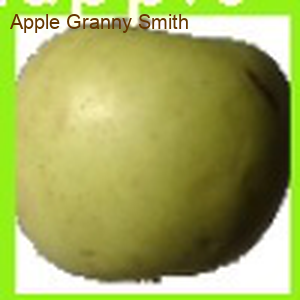

In [ ]:
from PIL import Image, ImageDraw, ImageFont
 

basewidth = 300

img = Image.open('/content/gdrive/My Drive/yolov5s/yolov5/runs/detect/exp/4_100.jpg')

fontsize = 20
font = ImageFont.truetype("/content/arial.ttf", fontsize)
txt= la_class[predict_key]

wpercent = (basewidth/float(img.size[0]))

hsize = int((float(img.size[1])*float(wpercent)))

img = img.resize((basewidth,hsize), Image.ANTIALIAS)

d = ImageDraw.Draw(img)
d.text((10,10), txt, font=font,fill=(100,55,0))

img.save('predapple.jpg') 
img